In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
data_path = "data/data_complete.csv"
import pandas as pd

# data = pd.read_csv(data_path, index_col="Date")
# data = data.iloc[:, 1:]
# data

In [3]:
import numpy as np
def f1(x):
    return np.log(x+5)

def f2(x):
    return np.exp(x)-5

1 1


  0%|          | 0/4000 [00:00<?, ?it/s]

Epoch 1 | train: Loss 352757.375000 Accuracy -0.2390 | validation: Loss 282349.250000 Accuracy -0.7188
Epoch 2 | train: Loss 348726.875000 Accuracy -0.2248 | validation: Loss 275020.093750 Accuracy -0.6742
Epoch 3 | train: Loss 344823.625000 Accuracy -0.2111 | validation: Loss 268273.093750 Accuracy -0.6332
Epoch 4 | train: Loss 341074.937500 Accuracy -0.1979 | validation: Loss 262105.671875 Accuracy -0.5956
Epoch 5 | train: Loss 337460.937500 Accuracy -0.1852 | validation: Loss 256430.640625 Accuracy -0.5611
Epoch 6 | train: Loss 333982.375000 Accuracy -0.1730 | validation: Loss 251254.828125 Accuracy -0.5296
Epoch 7 | train: Loss 330625.906250 Accuracy -0.1612 | validation: Loss 246551.156250 Accuracy -0.5009
Epoch 8 | train: Loss 327373.562500 Accuracy -0.1498 | validation: Loss 242186.312500 Accuracy -0.4743
Epoch 9 | train: Loss 324216.500000 Accuracy -0.1387 | validation: Loss 238190.125000 Accuracy -0.4500
Epoch 10 | train: Loss 321152.593750 Accuracy -0.1280 | validation: Loss 

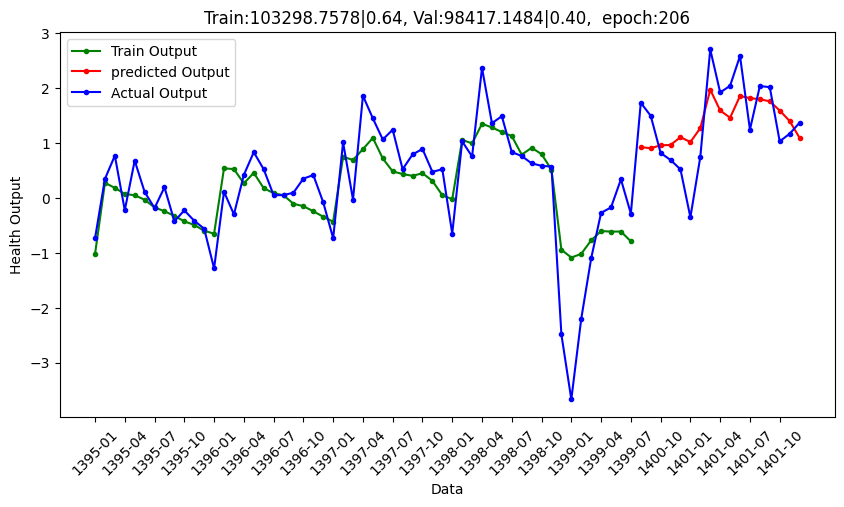

Epoch 206 | train: Loss 103298.757812 Accuracy 0.6372 | validation: Loss 98417.148438 Accuracy 0.4009


In [8]:
import DataLoader, Machine_Model, Engine, Information
from sklearn.preprocessing import MinMaxScaler
import torch
seed = 44
# seed = np.random.randint(0, 1000)
train_percent = 0.7
val_percent = 0.3

test_percent = None
batch_size = 200
torch.manual_seed(seed)

dataloader = DataLoader.MyDataloader(file_path=data_path, 
                                     train_percent=train_percent, 
                                     val_percent=val_percent,
                                     test_percent=test_percent, 
                                     batch_size=batch_size, 
                                     scalers=["StandardScaler"],
                                     func=f1,
                                     func_inverse=f2)
# raise
try:
    print(len(dataloader.train_dataloader), len(dataloader.val_dataloader), len(dataloader.test_dataloader))
except:
    print(len(dataloader.train_dataloader), len(dataloader.val_dataloader))

INPUT_SIZE = 1
HIDDEN_UNITS = 20
OUTPUT_SIZE = 1
DEPTH = 4
model0 = Machine_Model.LSTM_V1(input_size=INPUT_SIZE, hidden_size=HIDDEN_UNITS, output_size=1, depth_number=DEPTH)

EPOCHS = 12000
EPOCHS = 4000
loss_fn = torch.nn.MSELoss()

learning_rate = 0.001
# weight_decay = 0.000082
# weight_decay = 0.0004
weight_decay = 0.00017
optimizer = torch.optim.Adamax(model0.parameters(), learning_rate, weight_decay=weight_decay)
# optimizer = torch.optim.Adamax(model0.parameters(), lr=learning_rate)

engine = Engine.Machine_Engine(model=model0, dataloader=dataloader)
model0_results = engine.fit(loss_fn=loss_fn, 
                            optimizer=optimizer, 
                            epochs_num=EPOCHS, 
                            early_stop_patience=None, 
                            virtualize=False,
                            step_to_print=1)


In [5]:
scaler_x = dataloader.scaler_x[0]
scaler_y = dataloader.scaler_y[0]
scaler_y

StandardScaler()

In [48]:
for i in engine._inverse_scale(engine.testx[0, -1, 1:].unsqueeze(0), scaler=scaler_x, mode="torch"):
    print(i)
for i in engine._inverse_scale(engine.testx[0, :, 0].unsqueeze(0), scaler=scaler_y, mode="torch"):
    print(i)
engine._inverse_scale(engine.testy[0, :].unsqueeze(0), scaler=scaler_y, mode="torch")

[3.1700000e+02 4.5710000e+03 6.0600000e+02 1.7560000e+03 8.3000000e+01
 7.7841884e-09 1.0000002e+00 2.1473900e+05 5.4862000e+04]
[1664. 2027. 2186. 1800. 2216. 2341. 1971. 2136. 2182. 2085. 2272. 2172.
 2116.]


array([[2116.]], dtype=float32)

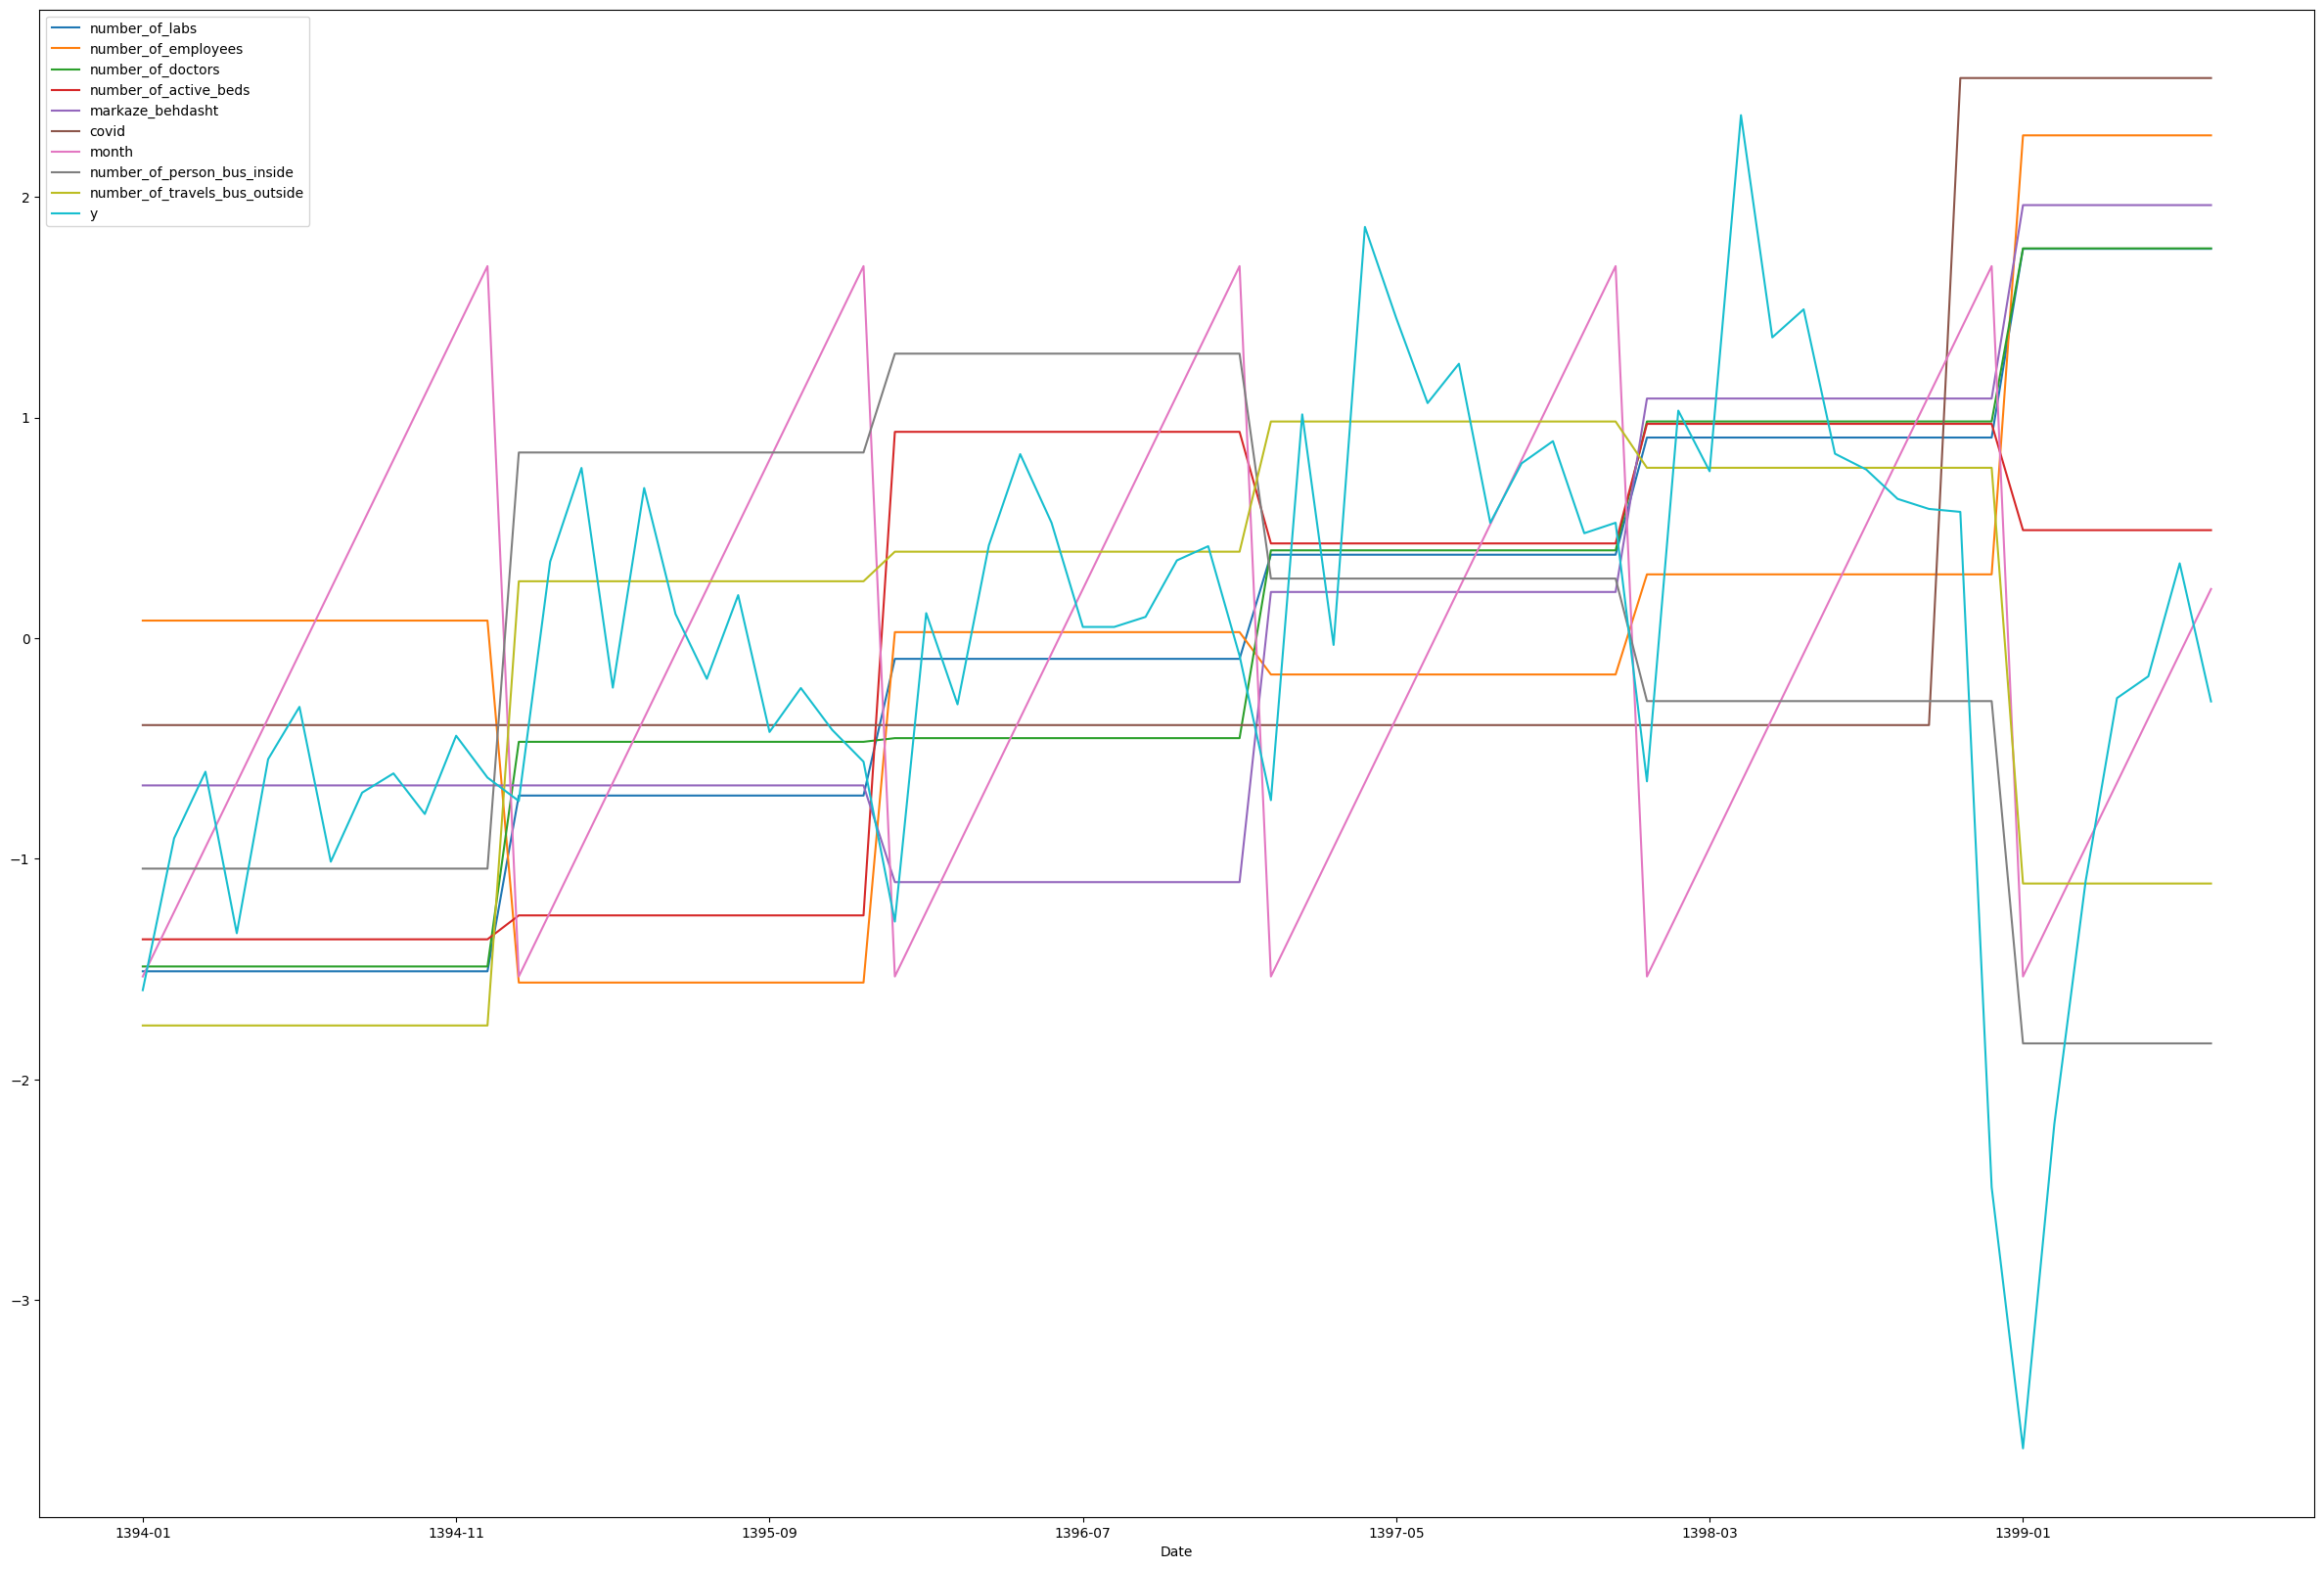

In [9]:
d = dataloader.train_datas[dataloader.features+dataloader.target]
d.plot(figsize=(30, 20));

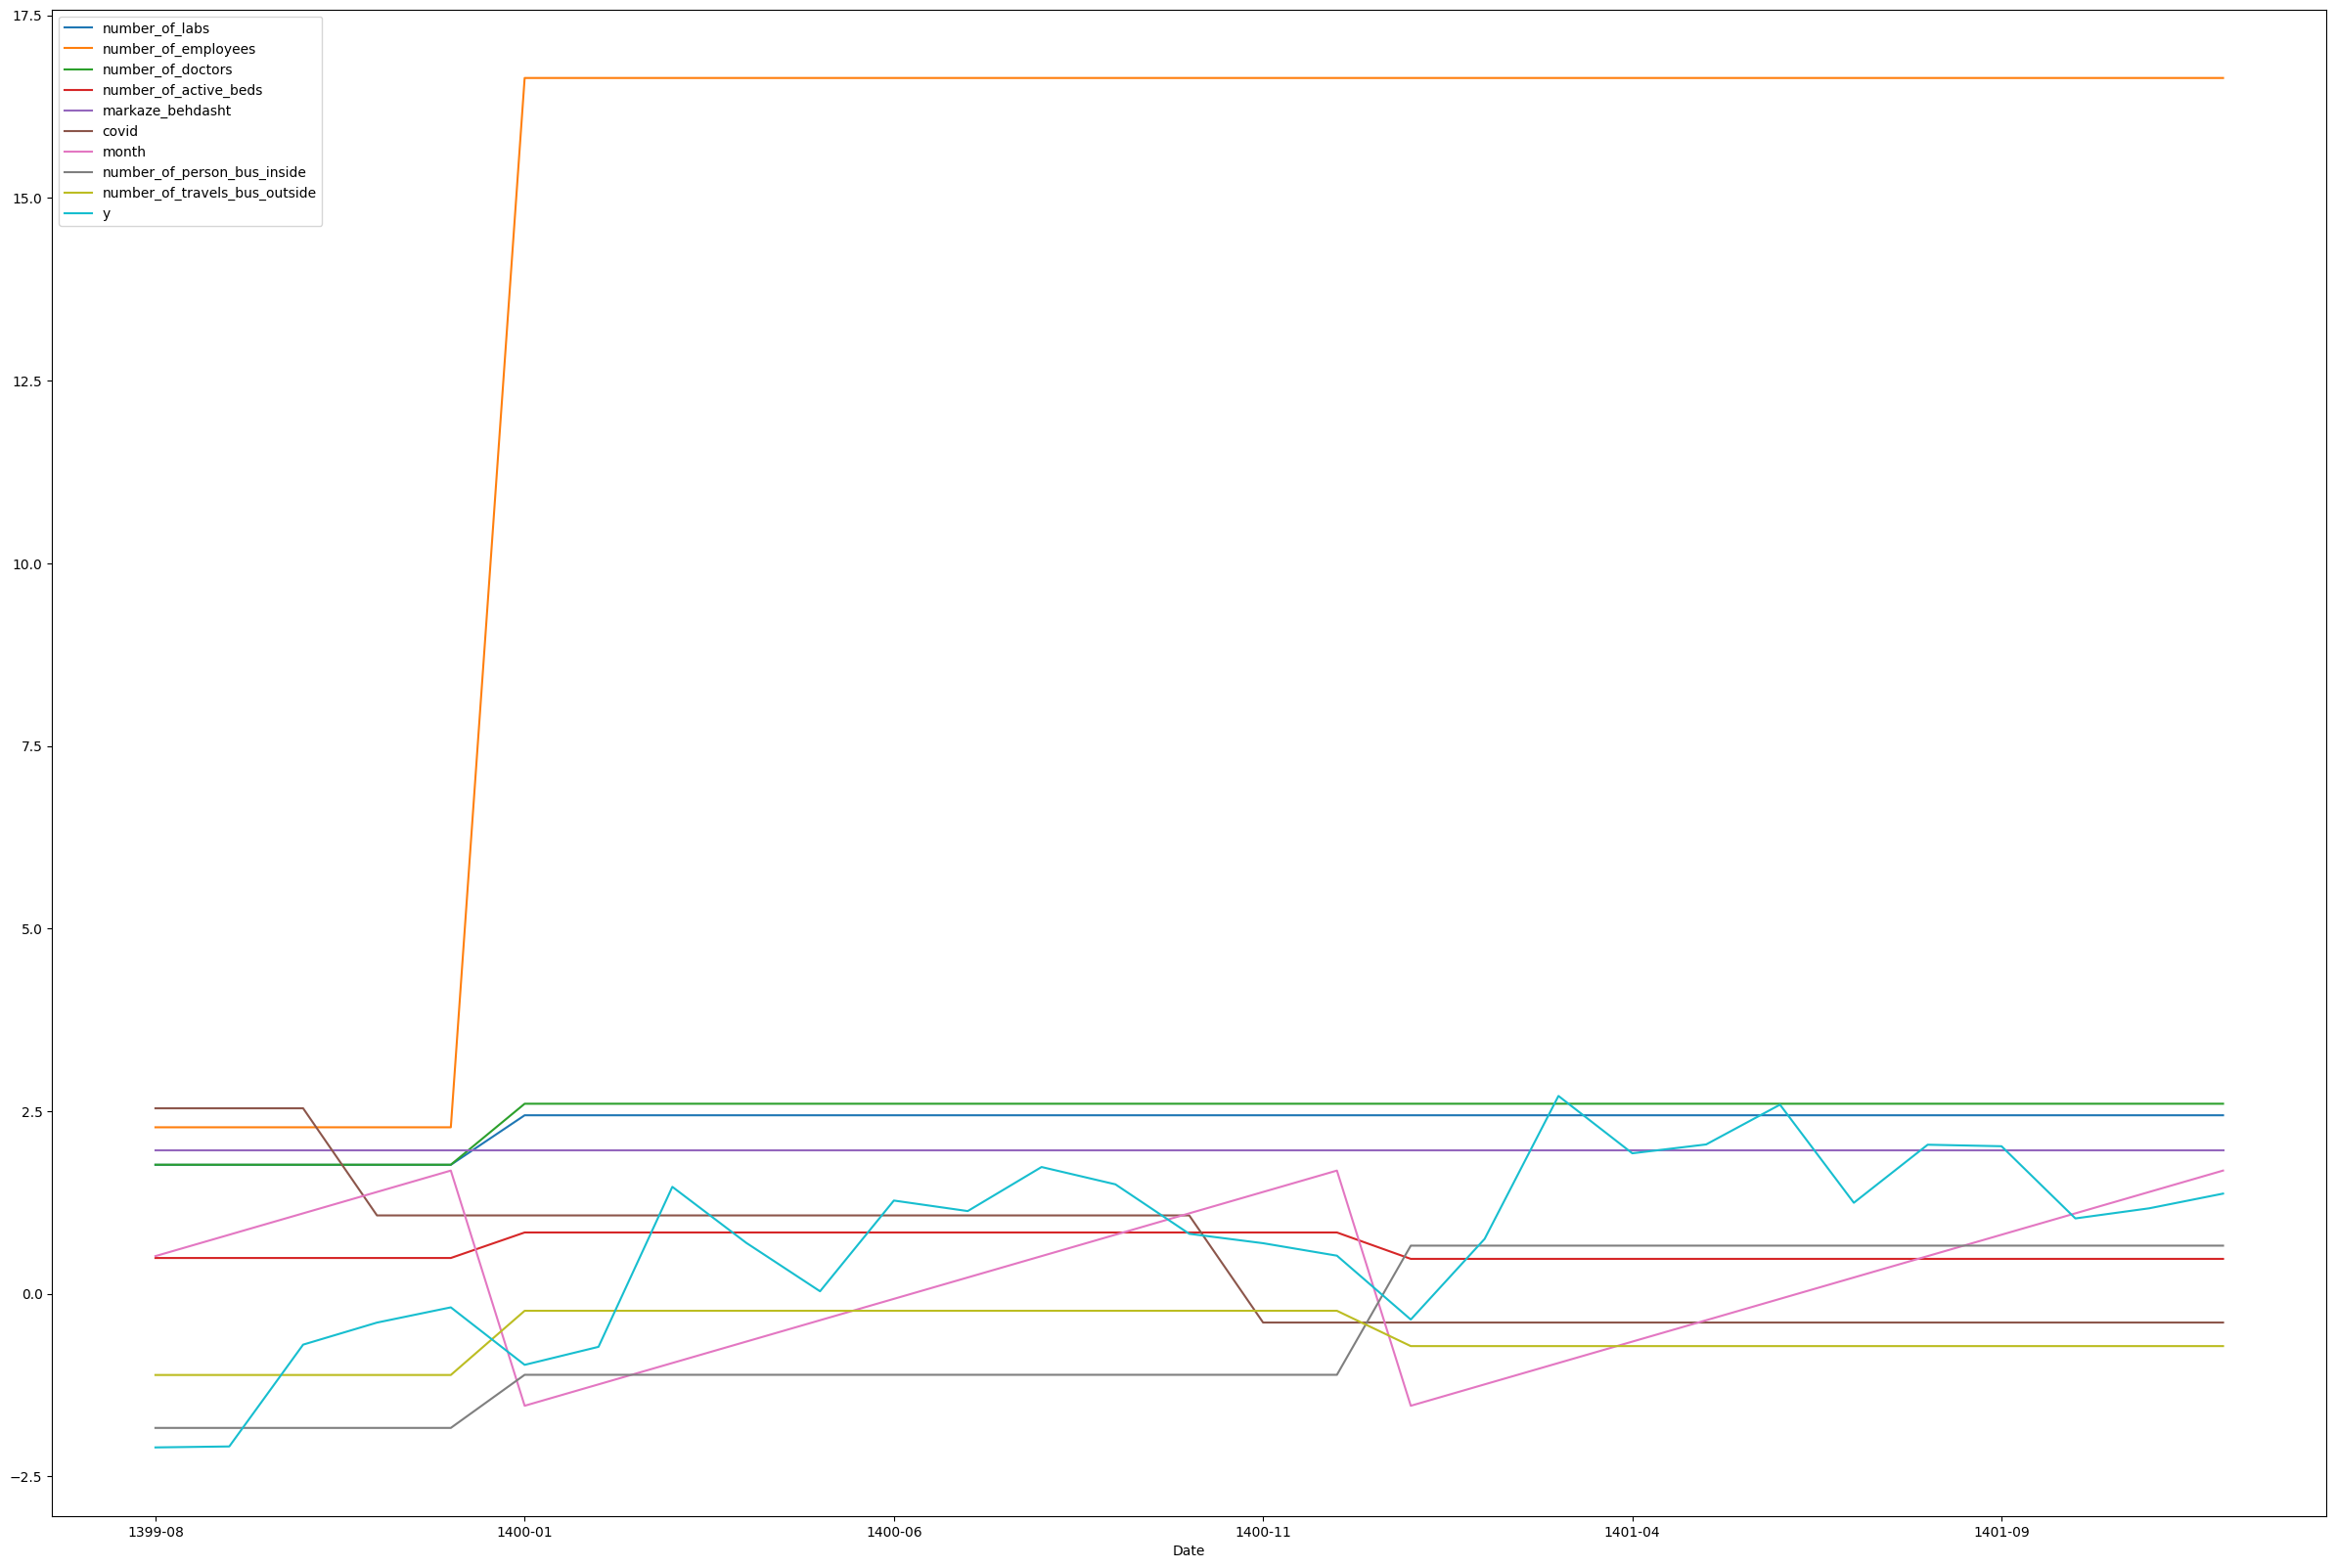

In [10]:
dd = dataloader.val_datas[dataloader.features+dataloader.target]
dd.plot(figsize=(30, 20));

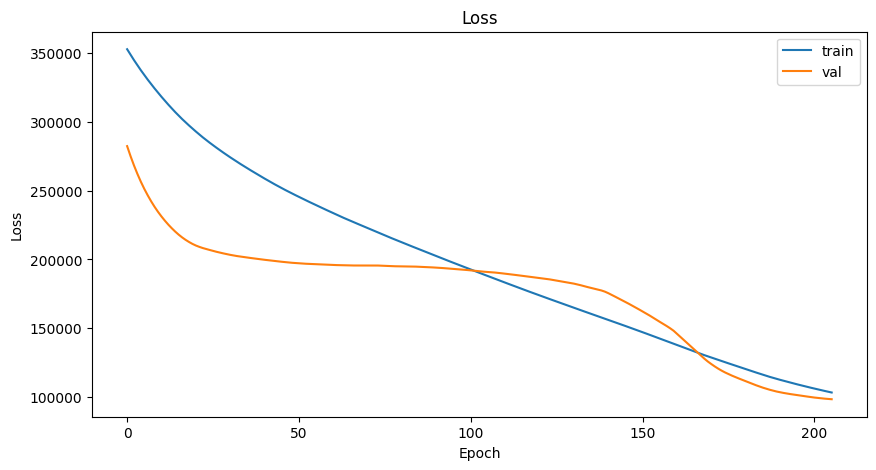

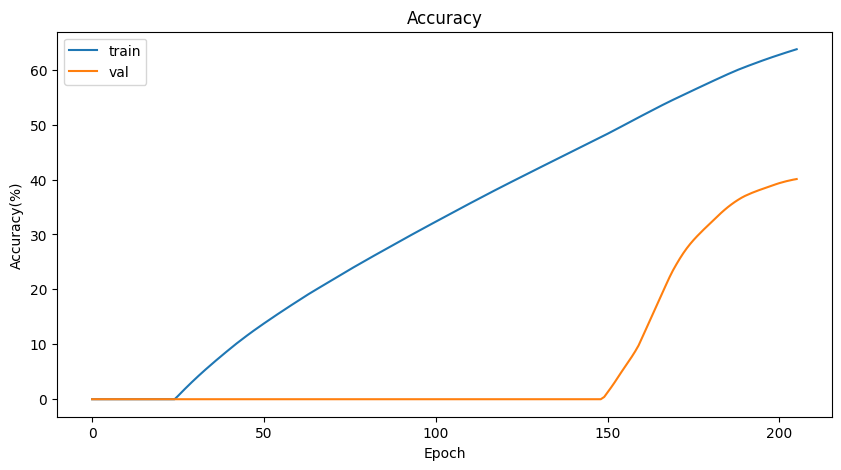

In [13]:
engine.plot_loss()
engine.plot_acc()

In [ ]:
engine.save()

NameError: name 'engine' is not defined

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=runs

In [ ]:
import numpy as np
x3 = np.array([[2870, 5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
               [2780, 5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
               [2319, 5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
               [2901, 5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
               [3933, 4639, 4270, 822597, 9468, 208977, 47243, 2312, 0],
               [3519, 4639, 4270, 822597, 9468, 208977, 47243, 2312, 0],
               [3583, 4639, 4270, 822597, 9468, 208977, 47243, 2312, 0],
               [3870, 4639, 4270, 822597, 9468, 208977, 47243, 2312, 0]])


In [ ]:
for i in range(7,8):
    name = Information.features[i]
    x3 = data[Information.features].iloc[88:,:]
    x2 = x3.iloc[:, i]
    x2[95] = x2[95]+1

    engine.predict(x3, dataloader.scaler_y, dataloader.scaler_x, n=12)
    engine.prediction.to_csv(f"data_distinc/health_prediction_{name}.csv")
    engine.prediction = None

C:\Users\keipj\AppData\Local\Temp\ipykernel_736\3139872168.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2[95] = x2[95]+1


In [ ]:
engine.predict(x3, dataloader.scaler_y, dataloader.scaler_x, n=12)

<bound method Machine_Engine.predict of <Engine.Machine_Engine object at 0x0000016E880EAB50>>

In [ ]:
engine.prediction.to_csv("health_prediction_covid.csv")

# Deployment of Health model

In [ ]:
import Machine_Model, Engine, Information
from pathlib import Path
import torch

INPUT_SIZE = 1
HIDDEN_UNITS = 18
OUTPUT_SIZE = 1
DEPTH = 4

model1 = Machine_Model.LSTM_V0(input_size=INPUT_SIZE, hidden_size=HIDDEN_UNITS, output_size=3, depth_number=DEPTH)
model2 = Machine_Model.NN_V0(input_size=17, hidden_size=HIDDEN_UNITS, output_size=OUTPUT_SIZE)

model1_path = "Health_RNN_V0_N1.pt"
model2_path = "Health_RNN_V0_N2.pt"

model1.load_state_dict(torch.load("model/RNN/" + model1_path))
model2.load_state_dict(torch.load("model/RNN/" + model2_path))

model1_size = Path("model/RNN", model1_path).stat().st_size // (1024)
model2_size = Path("model/RNN", model2_path).stat().st_size // (1024)
print(f"model 1 size: {model1_size} KB")
print(f"model 2 size: {model2_size} KB")

model 1 size: 43 KB
model 2 size: 2 KB


In [ ]:
health_demo_path = Path("demos/Health_Tourists/")
health_demo_path.mkdir(parents=True, exist_ok=True)

In [ ]:
%%writefile demos/Health_Tourists/model.py
import torch
import torchvision
from torch import nn


def create_effnetb2_model(num_classes:int=101,
                          seed:int=42):
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.efficientnet_b2(weights=weights)

    for param in model.parameters():
        param.requires_grad = False
        
    torch.manual_seed(seed)
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes)
    )
    
    return model, transforms